In [38]:
# for installing tensorflow open condaPrompt and type
# pip install tensorflow
import tensorflow as tf # using tf as an alias as it is generic
from matplotlib import pyplot as plt

In [39]:
# http://yann.lecun.com/exdb/mnist/
mnist = tf.keras.datasets.mnist

In [40]:
# We Split the data into two that is Training and test set.
# We use 70% data for taining and 30% for testing
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


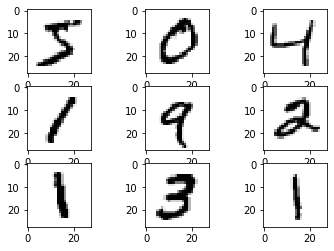

In [44]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show;
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.cm.binary)
# show the figure
plt.show();

In [5]:
# We need to the scale down the data using feature scaling (Normalization)
# Normalization: We scale down all the data between 0-1 using normalization
# all the values will remain intact.
# x_train[0]-- to check the original data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
# We are gonna noramalize the data against the column value
# x_train[0]-- to check the changes after Normalization.

In [6]:
# We use Convolution Neural Networks i.e is a fully connected layer
# https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
model = tf.keras.models.Sequential() # Basic Feed forward Network
# We perform the flattening of the data using Flatten Function.
#https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening
model.add(tf.keras.layers.Flatten()) # takes our 28x28 and makes it 1x784
#https://www.tutorialspoint.com/keras/keras_dense_layer.html
# relu is Rectified Linear Units
# activation function : the activation function of a node defines the output of that node given
# an input or set of inputs. A standard integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input.
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # Second layer has 128 neurons.
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # Third layer has 128 neurons.
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))# Fourth layer has 10neurons.
# We use softmax as we have multiple outputs han just binary.
# we have 10 in last function is because of 0-9 as output.

In [8]:
# Optimizer : Makes the outputs efficients on compilation
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # how will we calculate the error to minimize the loss
              metrics=['accuracy'])
# training the model
model.fit(x_train,y_train,epochs=10,workers=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1092 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0266 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [9]:
# We validate on the data loss and Accuracy of the model
validation_loss,validation_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9732


In [17]:
print('Validation_Loss         : '+str(round((validation_loss * 100),2))+'%')
print('Validation_Accuracy     : '+str(round((validation_accuracy * 100),2))+'%')

Validation_Loss         : 11.19%
Validation_Accuracy     : 97.32%


In [19]:
# Saving the Model
model.save('digit_model.model')

INFO:tensorflow:Assets written to: digit_model.model\assets


In [26]:
# loading the model for use
new_model = tf.keras.models.load_model('digit_model.model')
predictions =new_model.predict(x_test)

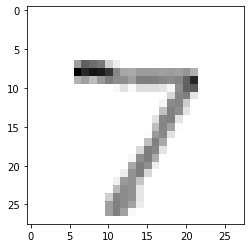

In [27]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show;

In [31]:
import numpy as np
print(predictions[0])


[6.7321954e-17 2.4849244e-11 8.3935893e-11 1.2011217e-08 3.1928090e-13
 1.3780161e-14 1.6156443e-20 1.0000000e+00 9.1137922e-12 3.7908135e-11]


In [30]:
# argmax returns you the index of the maximum value in the array.
Prediction = np.argmax(predictions[0])
print('The Number Displayed is : ',Prediction)

The Number Displayed is :  7


The Number Displayed is :  4


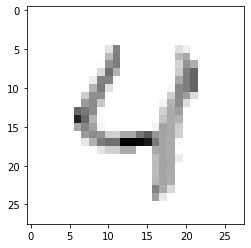

In [35]:
# testing with different values :
## Please run these cells only

x = np.random.randint(0,100)
plt.imshow(x_test[x],cmap=plt.cm.binary)
plt.show;
Prediction = np.argmax(predictions[x])
print('The Number Displayed is : ',Prediction)